In [1]:
from matplotlib import pyplot as plt
import numpy as np

In [2]:
dx=0.01

x=np.arange(-3,3+dx,dx)

v0=36
m=1
N=x.size

In [3]:
N


601

In [4]:
def V(x):
    if(abs(x)<1):
        return -v0
    else:
        return 0
    

In [5]:
v=np.zeros(x.size)
for i in range(x.size):
    v[i]=V(x[i])
    

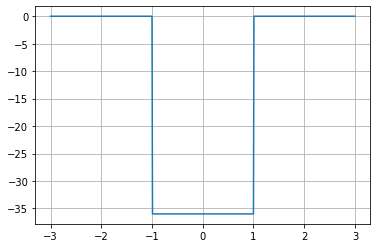

In [6]:
plt.plot(x,v)
plt.grid()

In [7]:
hbar=1
def k2(e,x):
    k=2*(e-V(x))
    return k

In [8]:
psi=np.zeros(N)
b=(dx**2)/12
def wavefunction(e):
    count=0
    for i in range(1,N-1):
        psi[0]=0
        psi[1]=1e-5
        psi[i+1]=(2*psi[i]*(1-5*b*k2(e,x[i]))-(1+b*k2(e,x[i-1]))*psi[i-1])/(1+b*k2(e,x[i+1]))
    return psi


In [9]:
def countnodes(e):
    count=0
    for i in range(1,N-1):
        if(wavefunction(e)[i+1]==0):
            wavefunction(e)[i+1]
        if np.sign(wavefunction(e)[i])!=np.sign(wavefunction(e)[i+1]):
            count=count+1
    return count


In [10]:
lpsi=np.zeros(N)
def lwavefunction(e):
    for i in range(N-2,0,-1):
        lpsi[N-1]=0
        lpsi[N-2]=-1e-5
        lpsi[i-1]=(2*lpsi[i]*(1-5*b*k2(e,x[i]))-(1+b*k2(e,x[i+1]))*lpsi[i+1])/(1+b*k2(e,x[i-1]))
    return lpsi


In [11]:
def normalize(e,z):
    for i in range(0,N-1):
        asum=0
        asum=asum+z[i]*z[i]
    g=1/np.sqrt(asum*dx)
    t=g*z
    return t
m=300

In [12]:
def matching(e):
    l=wavefunction(e)
    r=lwavefunction(e)
    icl=m
    c=np.abs(l[m]/r[m])
    p=r*c
    d=np.zeros((icl))
    c=np.zeros(N-icl)
    c=p[icl:N]
    d=l[0:icl]
    f=np.concatenate((d,c))
    return f


In [13]:
def checking(e):
    icl=300
    return matching(e)[icl+1]+matching(e)[icl-1]-2*matching(e)[icl]

In [23]:
emin=-30
emax=-18
for i in range(200):
    e=0.5*(emin+emax)
    if(checking(emax)*checking(e)<0):
        emin=e
    else:
        emax=e
    if(np.abs(checking(e))<1e-8):
        print(e)
        break

-20.73257455753628


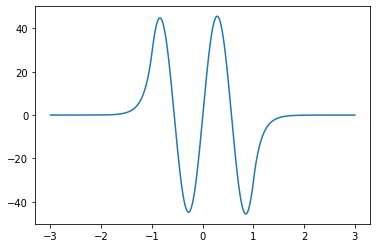

In [24]:
plt.plot(x,matching(-20.5040504))


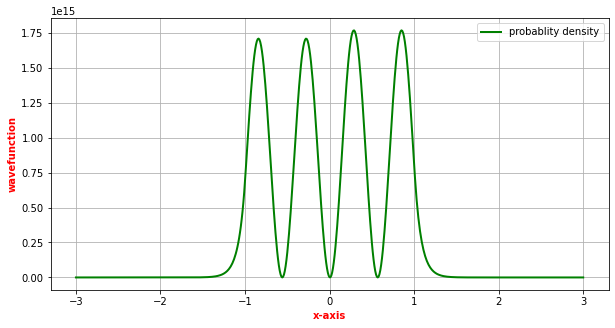

In [25]:
plt.figure(figsize=(10,5))
plt.plot(x,normalize(e,matching(-20.5040504))**2,color="green",lw=2,label="probablity density")
plt.xlabel("x-axis",fontweight="bold",color="red")
plt.ylabel("wavefunction",fontweight="bold",color="red")
plt.legend()
plt.grid()